In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os
import cv2 as cv
import math
import pandas as pd
#%matplotlib inline

In [10]:
#DIR = os.path.join(HOME, 'programming', 'dk39')
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK39'
ALIGNED = os.path.join(DIR, 'preps', 'aligned')
NORMALIZED = os.path.join(DIR, 'preps', 'normalized')
INPUT = ALIGNED
OUTPUT = NORMALIZED
files = sorted(os.listdir(INPUT))

In [11]:
def lognorm(img, limit):
    lxf = np.log(img + 0.005)
    lxf = np.where(lxf < 0, 0, lxf)
    xmin = min(lxf.flatten())
    xmax = max(lxf.flatten())
    return lxf * limit / (xmax - xmin) + xmax * limit / (xmax - xmin)  # log of data and stretch 0 to limit


def linnorm(img, limit):
    flat = img.flatten()
    hist, bins = np.histogram(flat, limit + 1)
    cdf = hist.cumsum()  # cumulative distribution function
    cdf = limit * cdf / cdf[-1]  # normalize
    # use linear interpolation of cdf to find new pixel values
    img_norm = np.interp(flat, bins[:-1], cdf)
    img_norm = np.reshape(img_norm, img.shape)
    #img_norm = limit - img_norm
    return img_norm.astype('uint16')

In [12]:
print(len(files))

469


In [27]:
# get oriented for comparison
img_inputs = []
img_outputs = []
file_inputs = []
titles = []
masks = []
section_number = 0
midpoint = len(files) // 2
#tmp_img = files[67]
#tfiles = [tmp_img]
dels = os.listdir(OUTPUT)
for d in dels:
    os.unlink(os.path.join(OUTPUT, d))

for i, file in enumerate(tqdm(files[100:150])):
    infile = os.path.join(INPUT, file)
    img = cv.imread(infile, -1)
    img_inputs.append(img)
    file_inputs.append(file)
    img = linnorm(img, 2**15)
    img_outputs.append(img)
    outpath = os.path.join(OUTPUT, file)    
    cv.imwrite(outpath, img.astype('uint16'))
    del img

100%|██████████| 50/50 [00:05<00:00,  8.65it/s]


In [15]:
print(len(img_outputs), len(file_inputs), len(titles) )

469 469 0


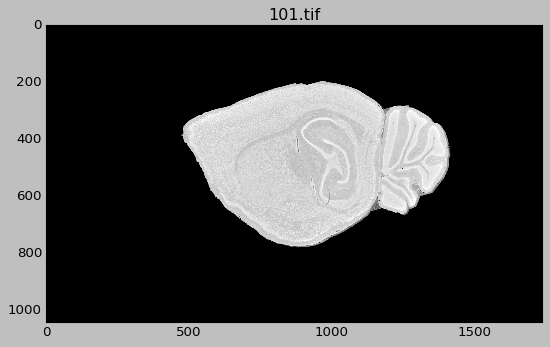

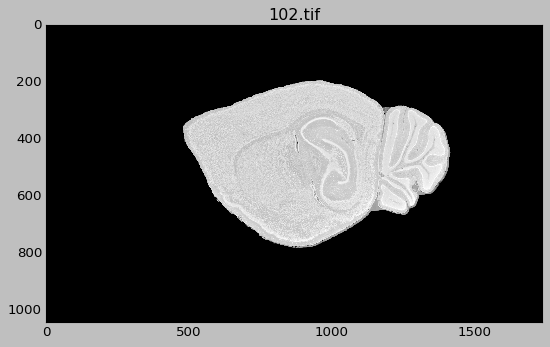

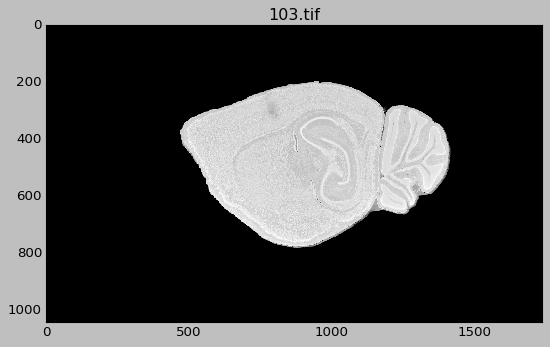

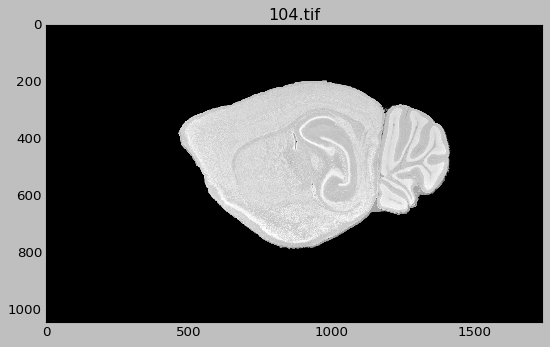

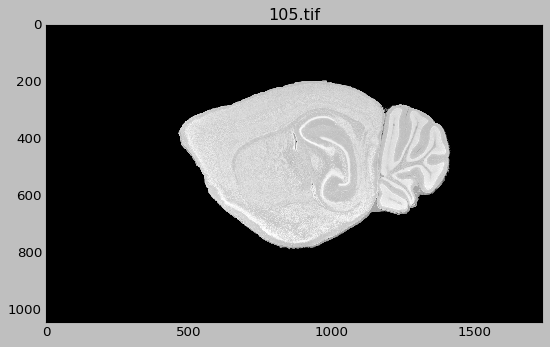

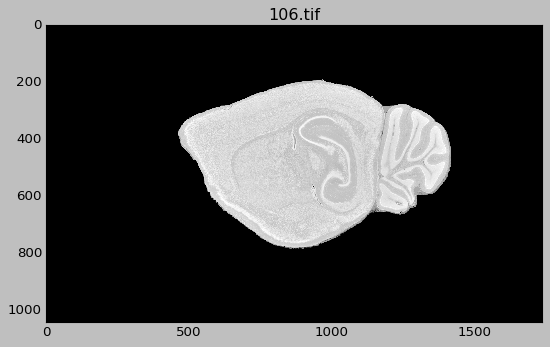

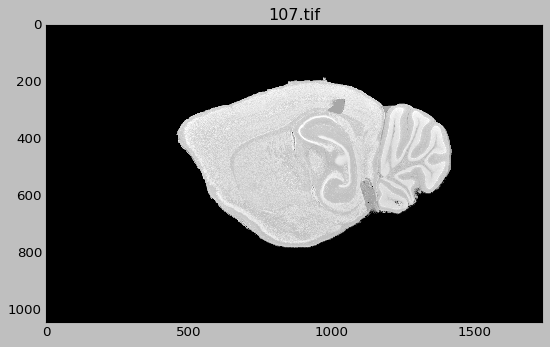

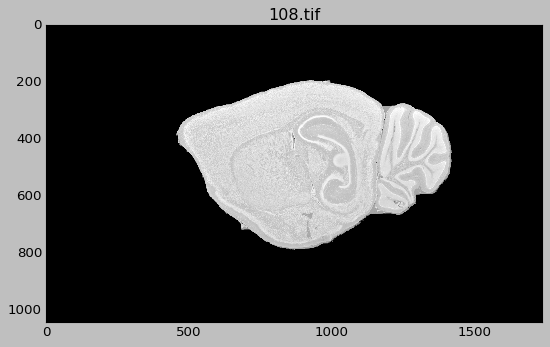

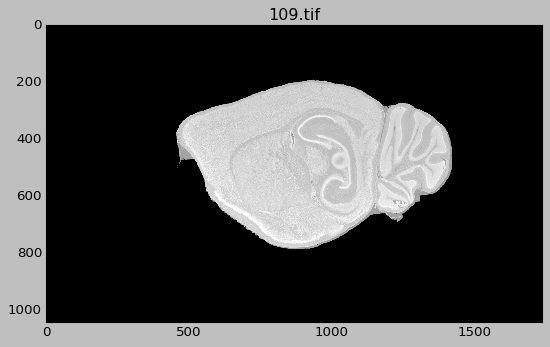

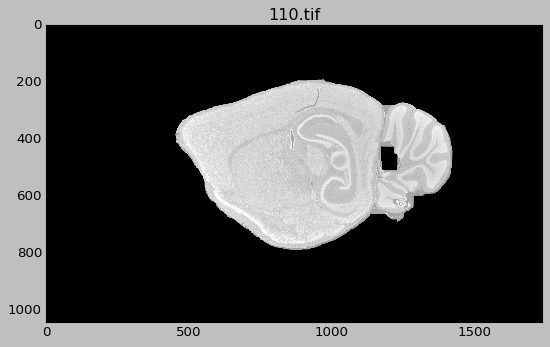

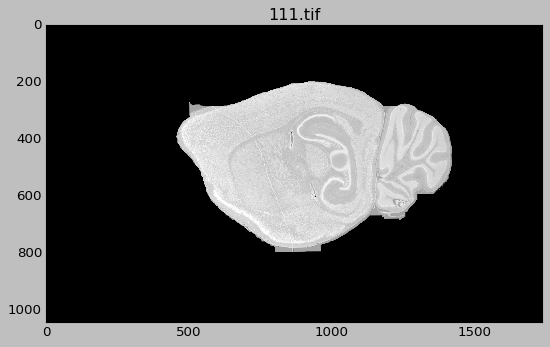

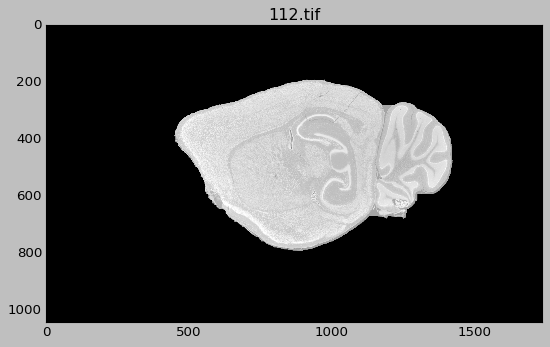

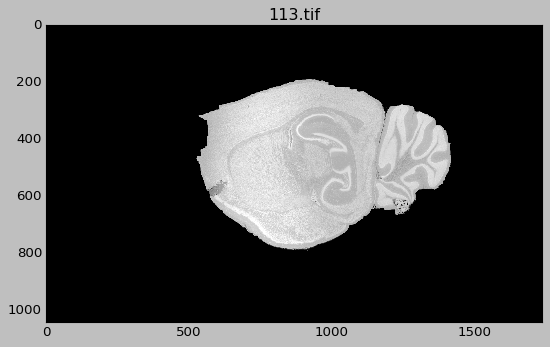

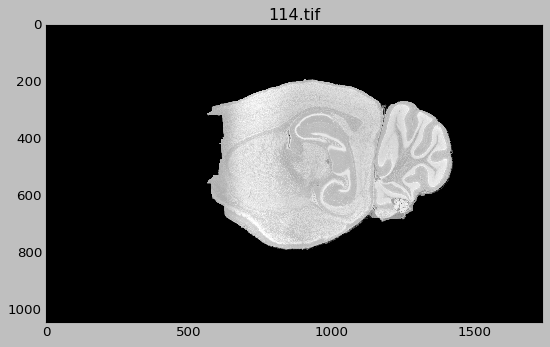

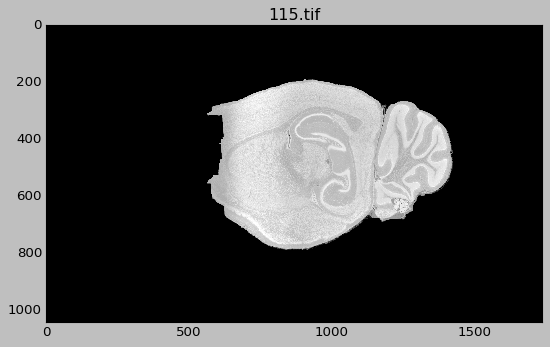

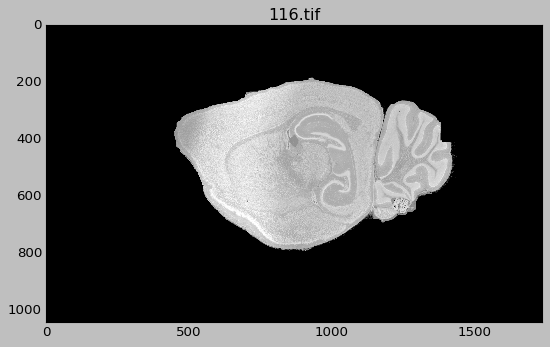

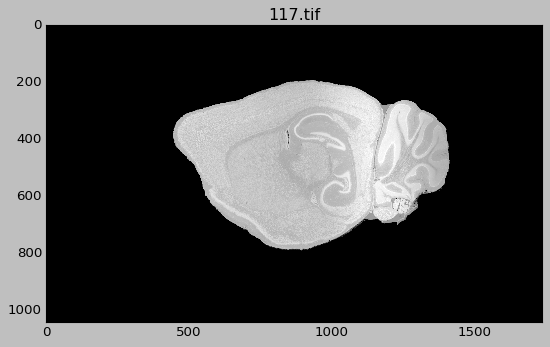

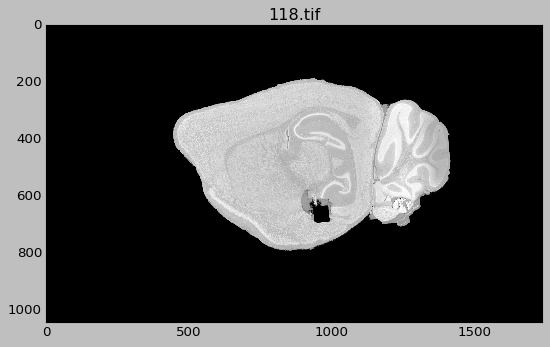

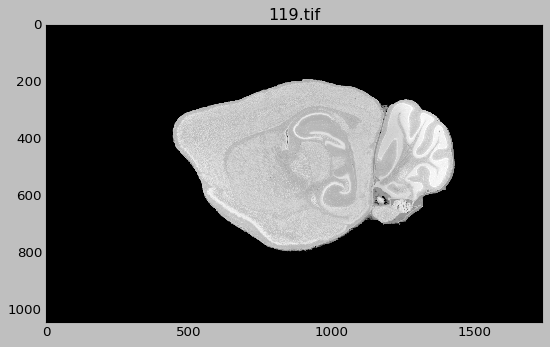

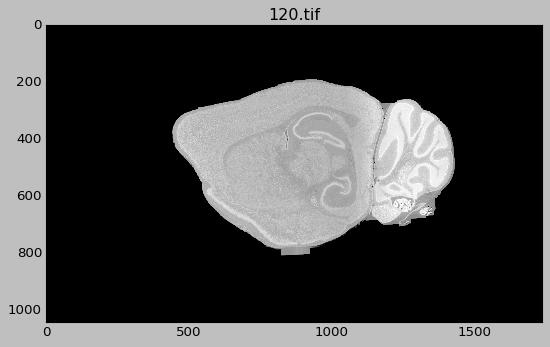

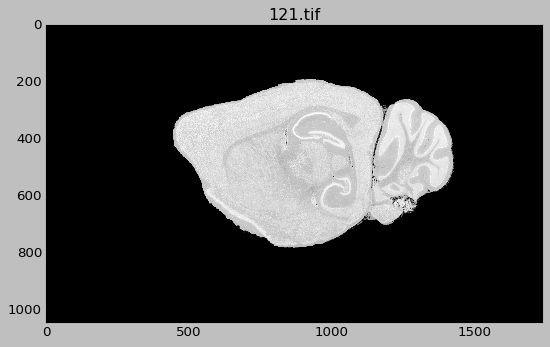

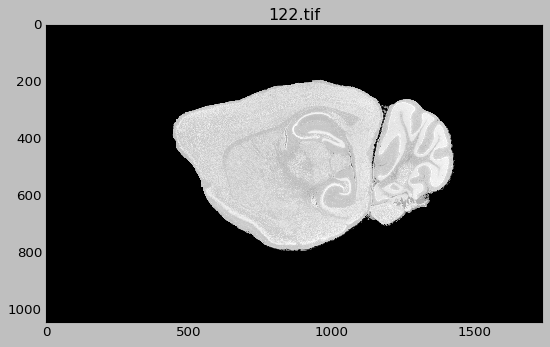

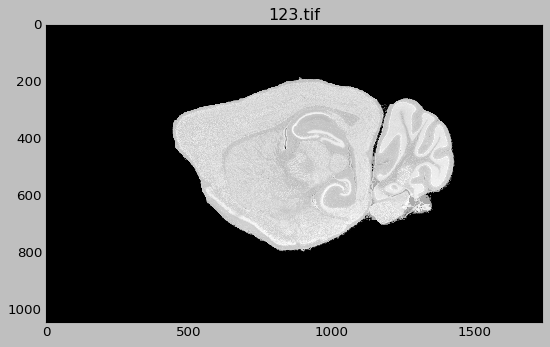

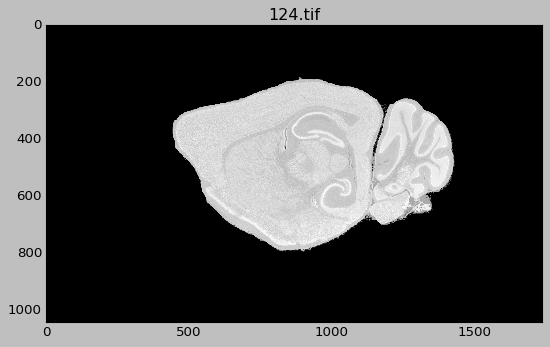

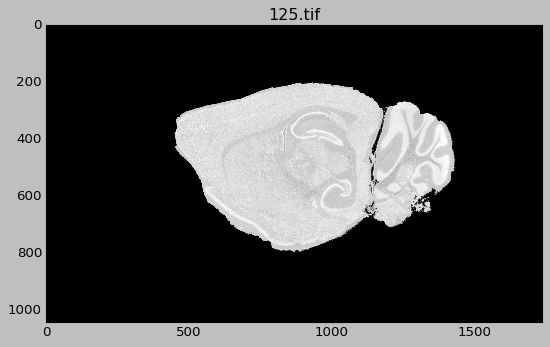

In [24]:
# display images
# check alignment
start, finish = (100,125)
displays = img_outputs[start:finish]
names = file_inputs[start:finish]
plt.style.use('classic')
for name,img in zip(names,displays):    
    plt.figure()
    plt.title('{}'.format(name))
    plt.imshow(img, cmap='gray')
    plt.show()

In [ ]:
len(bads)

In [ ]:
i = 14
test_img = img_inputs[i]
print(test_img.shape)
test_img = crop_rows(test_img, 30)
plt.figure()
plt.rcParams.update({'figure.figsize': [8, 6]})
plt.title('min width, min height: {} L,H {}'.format(titles[i], values[i]))
plt.imshow(test_img, cmap='gray')
plt.show()


In [ ]:
flat = test_img.flatten()
fmax = int(flat.max())
fmin = int(flat.min())
hist = np.histogram(flat)
print(fmin, fmax, test_img.dtype, test_img.shape, np.median(test_img))

In [ ]:
hist[1]

In [ ]:
hist = np.histogram(flat, bins=50)
hist[1][2]

In [ ]:
hist[1][3]